<a href="https://colab.research.google.com/github/NicolasPinell/Backtesting/blob/master/Shots2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install statsbomb

In [2]:
import statsbomb as sb
print(sb)
comps = sb.Competitions()
print(len(comps))  # 3
json_data = comps.data  # underlying json data

comps_df = comps.get_dataframe()

print(comps_df.columns)

print(comps_df[['season_id','season_name','competition_name','match_available']])

<module 'statsbomb' from '/usr/local/lib/python3.6/dist-packages/statsbomb/__init__.py'>
20
Index(['competition_id', 'season_id', 'country_name', 'competition_name',
       'competition_gender', 'season_name', 'match_updated',
       'match_available'],
      dtype='object')
    season_id season_name         competition_name             match_available
0          42   2019/2020  FA Women's Super League  2020-04-17T03:24:07.811908
1           4   2018/2019  FA Women's Super League     2020-02-27T15:55:20.540
2           3        2018           FIFA World Cup  2019-12-16T23:09:16.168756
3           4   2018/2019                  La Liga  2020-02-27T12:19:39.458017
4           1   2017/2018                  La Liga  2020-02-27T12:19:39.458017
5           2   2016/2017                  La Liga  2019-12-16T23:09:16.168756
6          27   2015/2016                  La Liga  2020-04-13T23:02:59.803428
7          26   2014/2015                  La Liga  2019-12-16T23:09:16.168756
8          25

In [3]:
matches = sb.Matches(event_id='11', season_id='37')
df = matches.get_dataframe()
print(df.columns)  # 7
print(df['metadata'][1])

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'last_updated', 'metadata', 'match_week', 'competition_stage',
       'stadium', 'referee'],
      dtype='object')
{'data_version': '1.1.0', 'shot_fidelity_version': '2', 'xy_fidelity_version': '2'}


In [4]:
events = sb.Events(event_id='8658')
df = events.get_dataframe(event_type='shot')
print(len(df))  # 23

print(df.columns)
print(df[['play_pattern','position','statsbomb_xg','body_part','type','outcome','technique','start_location_x', 'start_location_y', 'end_location_x',
       'end_location_y', 'end_location_z']])

23
Index(['event_type', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'possession_team', 'play_pattern', 'off_camera', 'team',
       'player', 'position', 'duration', 'under_pressure', 'statsbomb_xg',
       'key_pass_id', 'body_part', 'type', 'outcome', 'technique',
       'first_time', 'follows_dribble', 'redirect', 'one_on_one', 'open_goal',
       'deflected', 'start_location_x', 'start_location_y', 'end_location_x',
       'end_location_y', 'end_location_z'],
      dtype='object')
      play_pattern                  position  ...  end_location_y end_location_z
0   From Free Kick          Left Center Back  ...            36.6            5.0
1   From Free Kick      Left Center Midfield  ...            47.5            6.4
2   From Free Kick                 Left Wing  ...            43.6            0.8
3            Other      Right Center Forward  ...            37.6            0.1
4     Regular Play                Right Wing  ...            41.0     

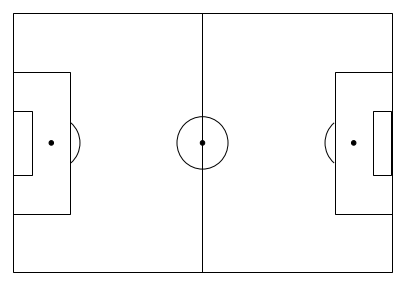

In [5]:
#! pip install matplotlib

import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch

def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,18], width = 18, height = 44, fill = False)
    RightPenalty = Rectangle([102,18], width = 18, height = 44, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,30], width = 6, height = 20, fill = False)
    RightSixYard = Rectangle([114,30], width = 6, height = 20, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((12,40),0.71,color="black")
    rightPenSpot = plt.Circle((108,40),0.71,color="black")
    leftArc = Arc((13,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((107,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
field = draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

In [40]:
print(df['start_location_x'][:,1])
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.annotate('',xy=df.apply(lambda x: (df['start_location_x'][1])))
field = draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

KeyError: ignored